In [1]:
import pandas as pd 
import numpy as np

# Clean up the British Library dataset

In [52]:
df = pd.read_csv('data/BL-Flickr-Images-Book.csv')
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [54]:
columns_to_drop = ['Edition Statement', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Engraver','Shelfmarks']

In [55]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [56]:
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Issuance type,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...


- let us properly inspect the data for data input issues
- For Date of Publication, there are some issues as shown below
    - 1879 \[1878\] : field with multiple year
    - 1839, 38-54: fields with a year and range with nonsensical meaning
    - \[1897?\], \[1894-96\], \[1894-96, \[1817.\] : fields with year and a question mark in square bracket
 To rectify the Date of publication problem, we wanna extract the first 4-digit number while removing the 'open-square-bracket (\[)' that started with some of the field inputs

In [36]:
pd.set_option('display.max_rows', 8287)

In [57]:
df['Date of Publication'] = df['Date of Publication'].str.extract(r'^(\[?\d{4})', expand=False).str.replace('[', '')

- Lets clean up the Place of publication field. The issues are listed below
    - London; Virtue & Yorston: Field with 'London'  ending with ";" and other nonsensical words
    - pp. 40. G. Bryan & Co: Oxford, 1898: Field with "Oxford" with , at end and : in front
    - pp. 40. W. Cann: Plymouth, \[1876?\]
    - Edinburgh & London
    - Newcastle-upon-Tyne
 
 This is an extremely messy data. The plan is to list out the most popular values in 'Place of publication' based on count >= 20. Find them in the messy inputs, if they are there, we then replace the messy input with those values.

In [58]:
counts = df['Place of Publication'].value_counts()

In [59]:
values_greater_than_20 = counts[counts >= 20].index

In [60]:
df['Place of Publication'].value_counts()[counts >= 20]

London            3868
Paris              479
Edinburgh          208
New York           177
Leipzig            119
Philadelphia        89
Berlin              70
Boston [Mass.]      52
Dublin              48
Glasgow             45
Oxford              44
Boston              41
Wien                38
Madrid              33
Stockholm           33
Bruxelles           28
Cambridge           26
Amsterdam           25
Stuttgart           24
Firenze             24
Chicago             24
Birmingham          23
Manchester          20
Milano              20
Name: Place of Publication, dtype: int64

In [61]:
# Lets find each column and replace with this column. This is because there are some nonsensical strings with this strings
for col in values_greater_than_20:
    df['Place of Publication'] = np.where(df['Place of Publication'].str.contains(col),
                                         col, df['Place of Publication'])

In [62]:
df['Place of Publication'].value_counts()[counts >= 20] # There is a signficant change in the value counts

London          4219
Paris            498
Edinburgh        232
New York         186
Leipzig          127
Boston           115
Philadelphia      89
Berlin            76
Oxford            49
Dublin            49
Glasgow           46
Wien              41
Cambridge         39
Madrid            34
Stockholm         34
Bruxelles         28
Stuttgart         27
Amsterdam         25
Chicago           25
Firenze           24
Birmingham        24
Manchester        23
Milano            20
Name: Place of Publication, dtype: int64

This has been successfully done because the value counts for each of the values vary slightly especially for London, Oxford and so on

### Let us answer some questions

- Top 10 date with most publication

In [77]:
top_10_date = df['Date of Publication'].value_counts()[:10]

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

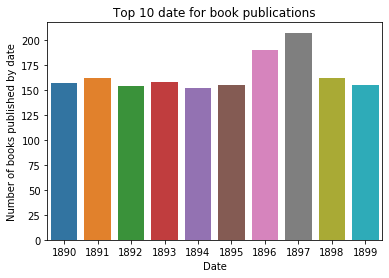

In [86]:
sns.barplot(top_10_date.index, top_10_date.values)
plt.title('Top 10 date for book publications')
plt.xlabel('Date')
plt.ylabel('Number of books published by date');

- The number of issuance type for the publications in the library 

In [92]:
issuance_type = df['Issuance type'].value_counts()

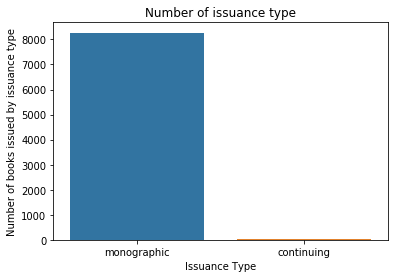

In [93]:
sns.barplot(issuance_type.index, issuance_type.values)
plt.title('Number of issuance type')
plt.xlabel('Issuance Type')
plt.ylabel('Number of books issued by issuance type');

# Clean up University towns data set

In [2]:

df = pd.read_csv('data/university_towns.txt', delimiter='\t', header=None)

This data has a couple of issues
- It has some columns with in this format Town\[edit\].
- The entries below Town\[edit\] belong to this town. Therefore we create a new field for it

It will be nice and \[1\] and \[2\]

It would be nice to remove \[edit\], \[1\] and \[2\]

In [3]:
university_towns = []
with open('data/university_towns.txt', 'r') as file:
    for line in file:
        if '[edit]' in line:
            state = line
        else:
            university_towns.append((state, line))          

Lets load in the university_town into a dataframe

In [14]:
df = pd.DataFrame(university_towns, columns= ['State', 'RegionAndUniversities'])

For this dataset, we need 2 pieces of information: State, TownUniversities
    - For state, we can access the column by removing \[edit\]\n
    - We then cleanup the RegionAndUniversities column by removing digits in square bracket

In [15]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

- This removes \[edit\], \[1\] and \[2\] and \[any_digit\]

In [16]:
df = df.replace(regex=[r'\[\w+\]', r'\[\d\]', r'\n', r'â€“'], value='') # This capture [edit] and [any_digit], and replace with an empty_string

- The next task is to extract out the text in parentheses
To do this, we split the dataframe into 2: The entries with ( and those without it

In [19]:
df.head(30)

,State,RegionAndUniversities
0,Alabama,Auburn (Auburn University)
1,Alabama,Florence (University of North Alabama)
2,Alabama,Jacksonville (Jacksonville State University)
3,Alabama,Livingston (University of West Alabama)
4,Alabama,Montevallo (University of Montevallo)
5,Alabama,Troy (Troy University)
6,Alabama,"Tuscaloosa (University of Alabama, Stillman College, Shelton State)"
7,Alabama,Tuskegee (Tuskegee University)
8,Alaska,Fairbanks (University of Alaska Fairbanks)
9,Arizona,Flagstaff (Northern Arizona University)


# Lets load in Olympic dataset

In [22]:
df = pd.read_csv('data/olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


- First the header is actually on index 0, so we should set the header on ir
- Secondly, change 01! 02! 03! to Gold, Silver, Bronze respectively
- Remove ? in front of Summer, Winter games

In [ ]:
# We write a function to implement the above

In [24]:
df = pd.read_csv('data/olympics.csv', header=1)
df.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [53]:
map_of_columns = {
    'Unnamed: 0': 'Country',
    '? Summer': 'Summer Olympics',
    '01 !': 'Gold',
    '02 !': 'Silver',
    '03 !': 'Bronze',
    '? Winter': 'Winter',
    '01 !.1': 'Gold',
    '02 !.1': 'Silver',
    '03 !.1': 'Bronze',
    'Total.1': 'Total',
    '? Games': 'Games',
    '01 !.2': 'Gold',
    '02 !.2': 'Silver',
    '03 !.2': 'Bronze'
    
}

In [54]:
# def clean_up_header(columns):
#     result = []
#     for col in columns:
#         if 'Unnamed' in col:
#             return 'Country'
#         if '?' in col:
#             col = col.replace('?', '')
#             return col
#         if '01' in col:
#             col = 'Gold'
#             return col
#         if '02' in col:
#             col = 'Silver'
#             return col
#         if '03' in col:
#             col = 'Bronze'
#             return col
#     return

In [55]:
# for col in pd.Series(df.columns):
#     print(col)

In [57]:
df.rename(columns=map_of_columns, inplace=True)

In [58]:
df.head() # Properly implemented

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter,Gold,Silver,Bronze,Total,Games,Gold,Silver,Bronze,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
